# Flight Information
# HABET Flight L-169-C
## Mission - Eclipse Flights

# Import
Our next step is to import the libraries we will be using.

In [29]:
# Import Mapping software
import tilemapbase

# Pandas for data analysis
import pandas as pd

# Setup Matplotlib to work in Jupyter notebooks
%matplotlib inline

#Import needed libraries, mainly numpy, matplotlib and datetime
import math
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta, date
import simplekml

# Import the Image function from the IPython.display module.
from IPython.display import Image

# Initial Conditions
It is useful to a few variables now so you don't need to worry about them later. This way you can set these now and then just run the entire notebook. We will set the following variables:

- Launch Location (latitude,longitude)
- Launch date/time (month-day-year HH:MM:SS)
- Flight ID (ex. L-158-D)

In [2]:
# Launch Coordinates in Decimal Degrees
launch_loc = (37.708989, -89.216643)

#Flight ID - Example LX-158-C
flight_id = 'L-169-C'

#time1  = datetime.strptime('8-01-2008 00:00:00', date_format)
#set the date and time format
date_format = '%m-%d-%Y %H:%M:%S'
launch_time = datetime.strptime('4-8-2024 12:59:00',date_format)

#set the DPI for saved graphs/plots
img_dpi = 300

## Read and Parse the file
We can use Pandas to read the CSV files and store them as a Pandas dataframe. The CSV files do not have headers on them. So, we will also go ahead and add labels for the columns as well.

In [31]:
har_df = pd.read_csv('HARdata.csv')
har_df.columns =['Device','Time', 'Lat', 'Lon', 'Altitude', 'Heading','Speed','PDOP','Pressure','Temp','Humidity']
datex = date(2024, 4, 8)
har_df['Lon'] /= 10000000
har_df['Lat'] /= 10000000
har_df['Altitude'] /= 1000
har_df['Temp'] = har_df.Temp / 100
har_df['Humidity'] = har_df.Humidity / 1000
har_df['Pressure'] = har_df.Pressure / 100
har_df['Time'] = pd.to_datetime(datex.strftime('%Y-%m-%d ') + har_df['Time'],format='%Y-%m-%d %H:%M:%S')
har_df['Speed'] = har_df.Speed / 10
har_df['PDOP'] = har_df.PDOP / 10
har_df['Heading'] = har_df.Heading / 100000
#har_temp = har_df.Temp / 100
#har_humidity = har_df.Humidity / 1000
#har_pressure = har_df.Pressure / 100
#har_lat = har_df.Lat / 10000000
#bert_lat = bert_df.Lat / 10000000
#har_lon = har_df.Lon / 10000000
#bert_lon = bert_df.Lon / 10000000
#har_alt = har_df.Altitude / 1000
print(har_df.head())


  Device                Time        Lat        Lon  Altitude    Heading  \
0  $$HAR 2024-04-08 17:53:04  37.708953 -89.216677   122.095  241.59052   
1  $$HAR 2024-04-08 17:53:07  37.708992 -89.216706   109.131  241.59052   
2  $$HAR 2024-04-08 17:53:10  37.709024 -89.216722   104.008  241.59052   
3  $$HAR 2024-04-08 17:53:13  37.709054 -89.216704   108.237  241.59052   
4  $$HAR 2024-04-08 17:53:16  37.709072 -89.216684   111.528  241.59052   

   Speed  PDOP  Pressure   Temp  Humidity  
0   27.2  14.1   1000.94  38.70    15.906  
1   34.7  13.9   1000.94  38.70    15.912  
2   83.8  14.4   1000.94  38.70    15.916  
3   39.8  13.8   1000.94  38.70    15.922  
4   37.6  13.4   1000.94  38.71    15.922  


# Flight Information
We can now do some calculations on a few stats on the flights. Let's start by calculating the flight time. BERT records at 1 sec intervals so we can list the launch time based on the information provided and then how many data points were recorded.

In [4]:
print('Launch date is:',launch_time.date())
print('Launch time is:',launch_time.time())
time_sec = len(har_df)*3
flight_time = timedelta(seconds=time_sec)
landing_time = launch_time+timedelta(seconds=time_sec)
print('Flight time is:',flight_time)
print('Landing time is:',landing_time)

Launch date is: 2024-04-08
Launch time is: 12:59:00
Flight time is: 2:37:57
Landing time is: 2024-04-08 15:36:57


## Distance
We can also look at the Launch location and final landing coordinates to get our distance.

In [5]:
from math import radians, sin, cos, acos, atan2,sqrt

# approximate radius of earth in km
R = 6373.0

lat1 = radians(launch_loc[0])
lon1 = radians(launch_loc[1])
lat2 = radians(har_lat.iloc[-1])
lon2 = radians(har_lon.iloc[-1])

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print('Result: %.2f km' % distance)

Result: 175.93 km


# Minimum and Maximum Data points
Before we graph the data, let's look at some minimum and maximum data points that were collected. 

In [ ]:
print('The maximum temperature recorded inside the payload was',har_temp.max(),'C')
print('The minimum temperature recorded inside the payload was',har_temp.min(),'C')
print('The maximum humidity recorded inside the payload was',har_humidity.max(),'%')
print('The minimum humidity recorded inside the payload was',har_humidity.min(),'%')

## Min/Max Dewpoint
Since we have both humidity and temperature, we can also calculate the dewpoint. Dewpoint is calculated as below.

$T_{temp} - (\frac{(100 - H_{humidity})}{5})$

In [ ]:
print('The maximum dewpoint recorded inside the payload was {:.2f} C'.format(har_temp.max()-((100 - har_humidity.max())/5.0)))
print('The minimum dewpoint recorded inside the payload was {:.2f} C'.format(har_temp.min()-((100 - har_humidity.min())/5.0)))

In [ ]:
print('The maximum pressure recorded inside the payload was',har_pressure.max(),'hPa')
print('The minimum pressure recorded inside the payload was',har_pressure.min(),'hPa')

In [ ]:
print('The maximum altitude obtained is',har_alt.max(),'m, or',(har_alt.max()*3.2808),'ft')

# Graphing
The following graphs are from the HAR board's BME680 sensor connected via a QWIIC connector and the GPS also connected via the QWIIC connector. HAR is located inside the spacecraft and is mostly shielded from direct light and the foam around the spacecraft does provide insulation. The spacecraft is not sealed, so the pressure will adjust based on external pressure. 

## Altitude
Let's start by graphing the altitude. This altitude is based on the GPS sensor and not on the pressure sensor with this current version.

For HABET Flight L-174-A, the spacecraft separated from the balloon instead of a normal burst. Normally we see a slow down as we approach our bursting altitude, but that did not happen in this case.

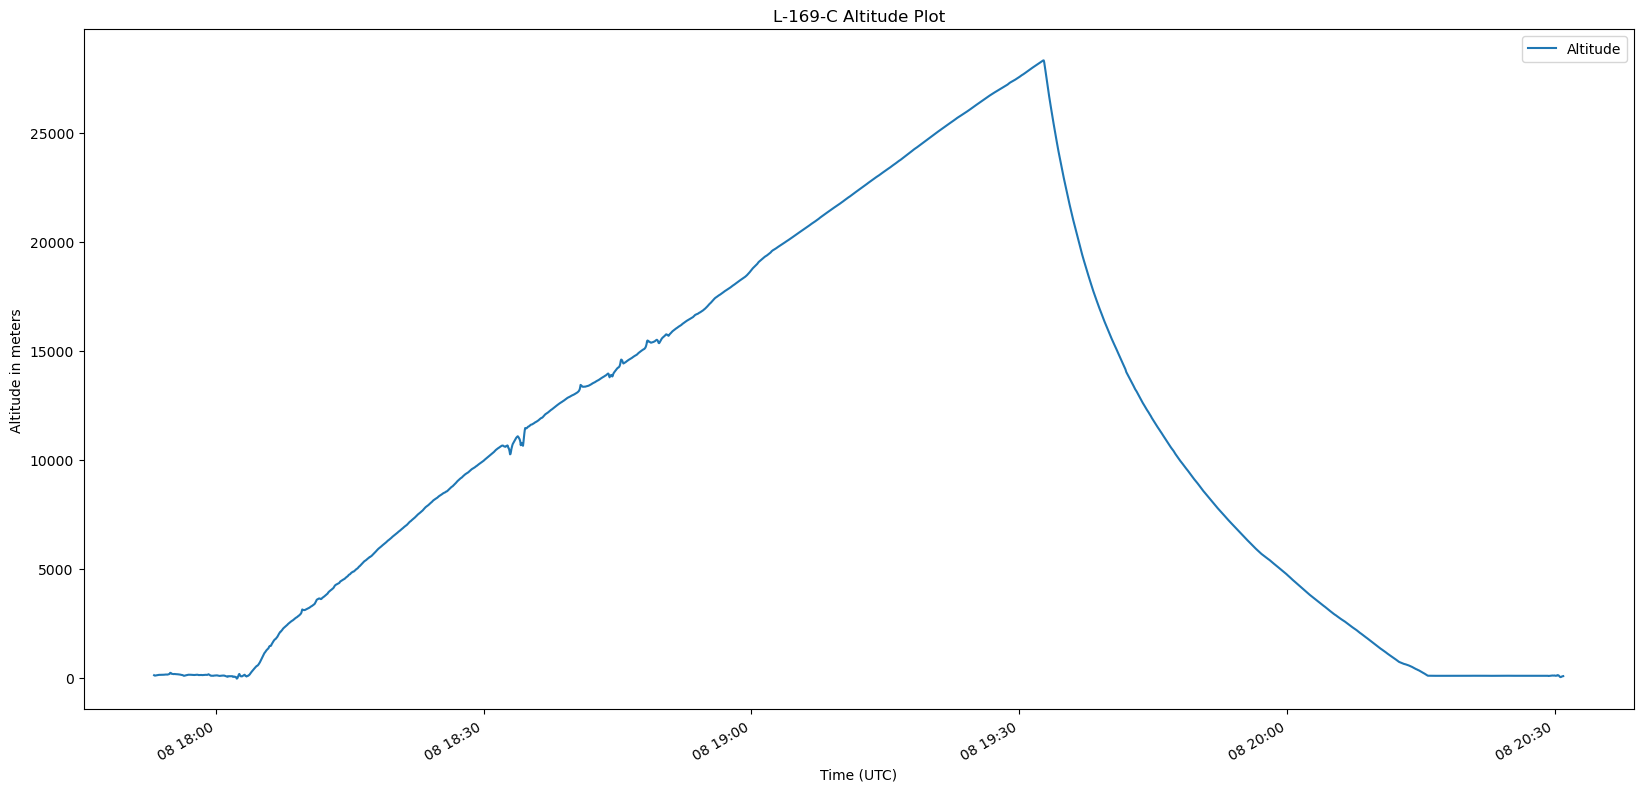

In [32]:
har_df.plot(title='{} Altitude Plot'.format(flight_id),ylabel='Altitude in meters',xlabel='Time (UTC)',x='Time',y='Altitude',figsize=(20, 10))
plt.savefig('Plots/har_alt_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/har_alt_plot.png',bbox_inches = 'tight',dpi = img_dpi)

In [ ]:
#har_alt.plot(title='{} Altitude Plot (HAR)'.format(flight_id),ylabel='Altitude in meters',xlabel='Time (UTC))',figsize=(20, 10));
#plt.savefig('Plots/har_alt_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
#plt.savefig('Plots/har_alt_plot.png',bbox_inches = 'tight',dpi = img_dpi)

## Temperature
Again, note that HAR is located in the spacecraft. 

In addition to the insulation, HAR is near equipment that generates a lot more heat than what BERT has. The Raspberry Pi Compute Module 4 and the Rocket M5 both generate quite a bit of heat during normal operation. This adds to the temperature inside the spacecraft.

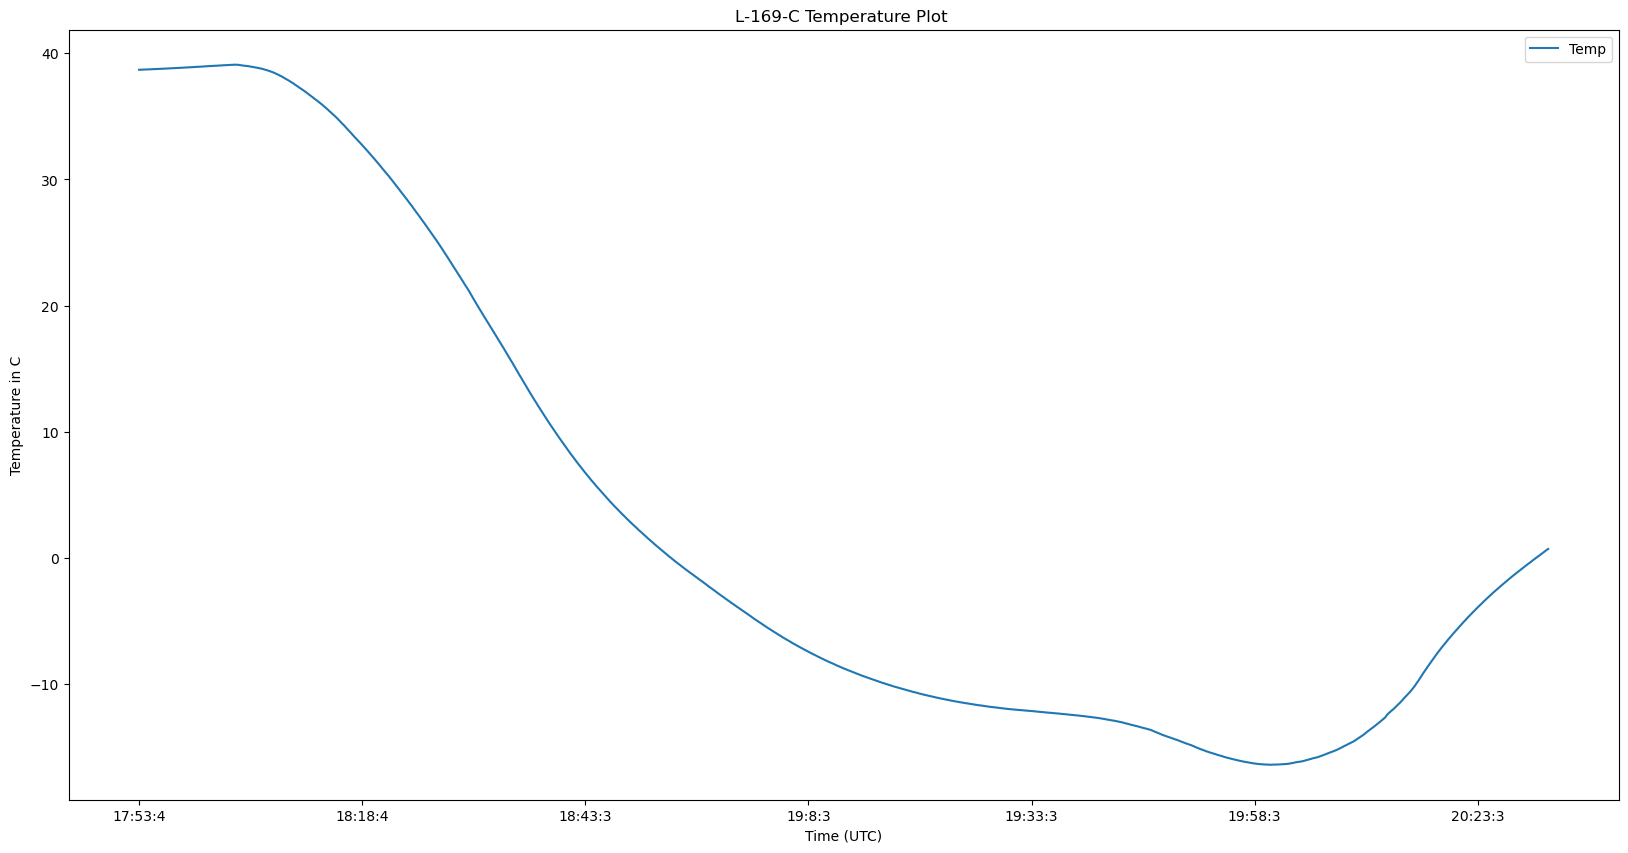

In [18]:
har_df.plot(title='{} Temperature Plot '.format(flight_id),ylabel='Temperature in C',xlabel='Time (UTC)',x='Time',y='Temp',figsize=(20, 10))

plt.savefig('Plots/har_temp_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/har_temp_plot.png',bbox_inches = 'tight',dpi = img_dpi)

## Humidity


In [ ]:
har_humidity.plot(title='{} Humidity Plot (HAR)'.format(flight_id),ylabel='Humidity as %',xlabel='Time at 1 sec intervals',figsize=(20, 10));
plt.savefig('Plots/har_humidity_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/har_humidity_plot.png',bbox_inches = 'tight',dpi = img_dpi)

## Pressure


In [ ]:
har_pressure.plot(title='{} Pressure Plot (HAR)'.format(flight_id),ylabel='Pressure in hPa',xlabel='Time at 1 sec intervals',figsize=(20, 10));
plt.savefig('Plots/har_pressure_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/har_pressure_plot.png',bbox_inches = 'tight',dpi = img_dpi)

## Temp vs Altitude
It's useful to look at this data vs Altitude. 

In [ ]:
har_df.plot(title='{} Temp vs Altitude Plot'.format(flight_id),ylabel='Altitude in meters',xlabel='Temp in C',x='Temp',y='Altitude',figsize=(20, 10))
plt.savefig('Plots/tempalt_plot.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/tempalt_plot.png',bbox_inches = 'tight',dpi = img_dpi)

In [ ]:
# Setup fixed points for graphing with

# Turn on subplots
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Humidity (%)', color=color)
ax1.plot(har_df.Humidity,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature in C', color=color)  # we already handled the x-label with ax1
ax2.plot(har_df.Temp)
ax2.tick_params(axis='y', labelcolor=color)

# Always have a good title
plt.title("{} Temp vs Humidity".format(flight_id),color='c')
# This allows us to save our pretty graph so we can frame it later
plt.savefig('Plots/temp_humidity.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/temp_humidity.png',bbox_inches = 'tight',dpi = img_dpi)

# Temp vs Pressure

In [ ]:
# Setup fixed points for graphing with

# Turn on subplots
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (hPa)', color=color)
ax1.plot(har_df.Pressure,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Temperature in C', color=color)  # we already handled the x-label with ax1
ax2.plot(har_df.Temp)
ax2.tick_params(axis='y', labelcolor=color)

# Always have a good title
plt.title("{} Temp vs Pressure".format(flight_id),color='c')
# This allows us to save our pretty graph so we can frame it later
plt.savefig('Plots/temp_pressure.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/temp_pressure.png',bbox_inches = 'tight',dpi = img_dpi)

In [ ]:
# Setup fixed points for graphing with

# Turn on subplots
fig, ax1 = plt.subplots(figsize=(20,10))
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Pressure (hPa)', color=color)
ax1.plot(har_df.Pressure,color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Humidity (%)', color=color)  # we already handled the x-label with ax1
ax2.plot(har_df.Humidity)
ax2.tick_params(axis='y', labelcolor=color)

# Always have a good title
plt.title("{} Humidity vs Pressure".format(flight_id),color='c')
# This allows us to save our pretty graph so we can frame it later
plt.savefig('Plots/humidity_pressure.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/humidity_pressure.png',bbox_inches = 'tight',dpi = img_dpi)

# Mapping the data
Let's map the data. There are a couple of ways to do this. First, we can save the information as a Keyhole Markup Language (KML). This format is then easy to import into Google Maps or Google Earth. Other systems can import a KML file. 

The second method is to map the data and for that, we can use timemapbase which will download map tiles from Open Street Maps.

In [ ]:
har_df["Lon"] /= 10000000
har_df["Lat"] /= 10000000
har_df["Altitude"] /= 1000

In [ ]:
tilemapbase.init(create=True)

# Create KML file
A KML file allows us to import the path of the spacecraft into other programs. This allows us to make the KML file and save it.

In [ ]:
kml = simplekml.Kml()
linestring = kml.newlinestring(name=flight_id)
har_df.apply(lambda X: linestring.coords.addcoordinates([( X["Lon"],X["Lat"],X["Altitude"])]) ,axis=1)

linestring.altitudemode = simplekml.AltitudeMode.relativetoground
linestring.extrude = 1
linestring.linestyle.color = simplekml.Color.green
linestring.linestyle.width = 5
linestring.polystyle.color = simplekml.Color.orange
#pol = kml.newpolygon(name= 'ACTONO', description= 'Acton County', 
#outerboundaryis=tuples, extrude=extrude, altitudemode=altitudemode)

#Saving
kml.save("KML/flight.kml")

# Map the data
We can start by graphing the latitude and longitude data. This clearly shows the path, but without a map it does not give us a reference to things such as streets and other features.

In [ ]:
color = 'tab:blue'
fig = plt.figure(figsize=(20, 20))
# Always have a good title and labels
plt.ylabel('Latitude (DD.MM)', color=color)
plt.xlabel('Longitude (DD.MM)', color=color)

plt.title("{} HAR GPS Plot".format(flight_id),color='r')
plt.plot(har_lon,har_lat)
plt.savefig('Plots/gps_plot_nomap.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/gps_plot_nomap.png',bbox_inches = 'tight',dpi = img_dpi)

## 3D plot
We can do a 3D plot that has the latitude, longitude and altitude. Again, there is no map for a reference but it does give us a fairly good picture of what the flight path looked like.

In [ ]:
#from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D

ur = (42.133700, -93.494635)
ll = (42.042358, -93.692460)
# Creating a 3D plot
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
#fig,axs = plt.subplots(1,2,subplot_kw={'projection':'3d'},figsize=(20, 10))
#fig = plt.figure(figsize=(15, 15))
#ax = Axes3D(fig)
#ax.plot3D(har_lon,har_lat,har_alt)
# Plotting data
scatter = ax.scatter(har_lon, har_lat, har_alt, c=har_alt, cmap='winter_r', marker='o')


ax.plot3D(har_lon,har_lat,har_alt)
ax.set_xlabel('Longitude (DD.MM)')
ax.set_ylabel('Latitude (DD.MM)')
ax.set_zlabel('Altitude (m)')
ax.set_title('{} 3D Plot'.format(flight_id))
#ax.view_init(elev=30, azim=30)

# Adding a color bar to indicate altitude values
color_bar = fig.colorbar(scatter, ax=ax, shrink=0.5, aspect=5)
color_bar.set_label('Altitude')


plt.savefig('Plots/3D_Map_View.pdf',bbox_inches = 'tight',dpi = img_dpi)
plt.savefig('Plots/3D_Map_View.png',bbox_inches = 'tight',dpi = img_dpi)

## Mapping using BaseMaps
We can use timemapbase to download Open Street Map tiles. We will center this map on the launch location.

In [ ]:
# Define the `extent`
color='blue'

# Zoom, the higher the number the zoomed out it will be. This is centered on
# the launch location
degree_range = 1.9

extent = tilemapbase.Extent.from_lonlat(launch_loc[1] - degree_range, launch_loc[1] + degree_range,
                  launch_loc[0] - degree_range, launch_loc[0] + degree_range)
extent = extent.to_aspect(1.0)

# Convert to web mercator
path = [tilemapbase.project(x,y) for x,y in zip(har_lon, har_lat)]
x, y = zip(*path)

fig, ax = plt.subplots(figsize=(20,20))

plotter = tilemapbase.Plotter(extent, tilemapbase.tiles.build_OSM(), width=800)
plotter.plot(ax)
plt.ylabel('Latitude (Mercator)', color=color)
plt.xlabel('Longitude (Mercator)', color=color)

plt.title("{} GPS Plot on Street map".format(flight_id),color='r')

ax.plot(x, y,"b-")
plt.savefig('Plots/gps_plot_map.pdf',bbox_inches = "tight",dpi = img_dpi)
plt.savefig('Plots/gps_plot_map.png',bbox_inches = "tight",dpi = img_dpi)

## Zooming in
We can zoom in, let's zoom in on the landing area. To do this we will change the center area based on the last longitutde and latitude recorded which is at the end of the flight. 

In [ ]:
# Define the `extent`
color='blue'

# Zoom, the higher the number the zoomed out it will be. This is centered on
# the landing location
degree_range = 0.05

extent = tilemapbase.Extent.from_lonlat(har_lon.iloc[-1] - degree_range, har_lon.iloc[-1] + degree_range,
                  har_lat.iloc[-1] - degree_range, har_lat.iloc[-1] + degree_range)
extent = extent.to_aspect(1.0)

# Convert to web mercator
path = [tilemapbase.project(x,y) for x,y in zip(har_lon, har_lat)]
x, y = zip(*path)

fig, ax = plt.subplots(figsize=(20,20))
t = tilemapbase.tiles.Carto_Light
plotter = tilemapbase.Plotter(extent, t, width=800)
plotter.plot(ax)
plt.ylabel('Latitude (Mercator)', color=color)
plt.xlabel('Longitude (Mercator)', color=color)

plt.title("{} GPS Plot Landing".format(flight_id),color='r')

ax.plot(x, y,"b-")
plt.savefig('Plots/gps_plot_map_landing.pdf',bbox_inches = "tight",dpi = img_dpi)
plt.savefig('Plots/gps_plot_map_landing.png',bbox_inches = "tight",dpi = img_dpi)